# THIS IS A MODEL TO PREDICT THE GDP OF RESPECTIVE COUNTRY    BASED ON THE POPULATION AND CLIMATE FACTORS


In [1]:
#In this project we are  investigating on about 227 countries
#we are considering about all major factors that affect the gdp

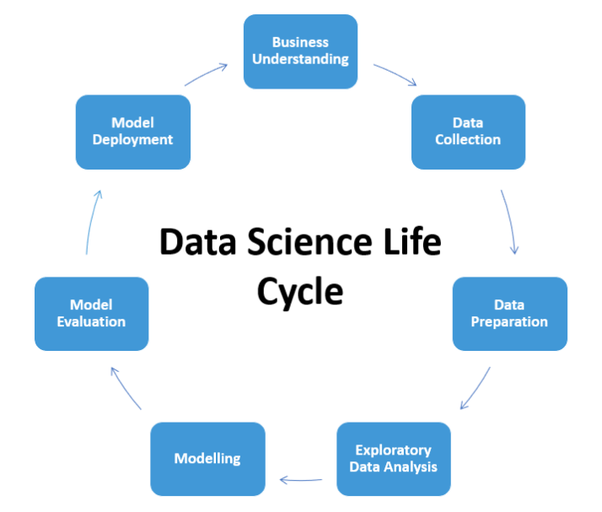

In [2]:
from IPython.display import Image
Image(filename="image.png",width=900,height=400)

# Load Libraries

In [3]:
import numpy as np#For linear algebra
import pandas as pd #For data processing,csv files for reading
import seaborn as sns#for ploting the graphs
from matplotlib import pyplot as plt

# Table data overview

In [4]:
data=pd.read_csv('gdp.csv',na_values=['###','??'])

In [5]:
data

Country                               Region  Population  \
0             Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1                 Albania   EASTERN EUROPE                          3581655   
2                 Algeria   NORTHERN AFRICA                        32930091   
3          American Samoa   OCEANIA                                   57794   
4                 Andorra   WESTERN EUROPE                            71201   
5                  Angola   SUB-SAHARAN AFRICA                     12127071   
6                Anguilla               LATIN AMER. & CARIB           13477   
7       Antigua & Barbuda               LATIN AMER. & CARIB           69108   
8               Argentina               LATIN AMER. & CARIB        39921833   
9                 Armenia                  C.W. OF IND. STATES      2976372   
10                  Aruba               LATIN AMER. & CARIB           71891   
11              Australia   OCEANIA                                20264082   
12                Austria   WESTERN EUROPE                          8192880   
13             Azerbaijan                  C.W. OF IND. STATES      7961619   
14           Bahamas, The               LATIN AMER. & CARIB          303770   
15                Bahrain   NEAR EAST                                698585   
16             Bangladesh         ASIA (EX. NEAR EAST)            147365352   
17               Barbados               LATIN AMER. & CARIB          279912   
18                Belarus                  C.W. OF IND. STATES     10293011   
19                Belgium   WESTERN EUROPE                         10379067   
20                 Belize               LATIN AMER. & CARIB          287730   
21                  Benin   SUB-SAHARAN AFRICA                      7862944   
22                Bermuda   NORTHERN AMERICA                          65773   
23                 Bhutan         ASIA (EX. NEAR EAST)              2279723   
24                Bolivia               LATIN AMER. & CARIB         8989046   
25   Bosnia & Herzegovina   EASTERN EUROPE                          4498976   
26               Botswana   SUB-SAHARAN AFRICA                      1639833   
27                 Brazil               LATIN AMER. & CARIB       188078227   
28     British Virgin Is.               LATIN AMER. & CARIB           23098   
29                 Brunei         ASIA (EX. NEAR EAST)               379444   
..                     ...                                  ...         ...   
197                 Syria   NEAR EAST                              18881361   
198                Taiwan         ASIA (EX. NEAR EAST)             23036087   
199            Tajikistan                  C.W. OF IND. STATES      7320815   
200              Tanzania   SUB-SAHARAN AFRICA                     37445392   
201              Thailand         ASIA (EX. NEAR EAST)             64631595   
202                  Togo   SUB-SAHARAN AFRICA                      5548702   
203                 Tonga   OCEANIA                                  114689   
204     Trinidad & Tobago               LATIN AMER. & CARIB         1065842   
205               Tunisia   NORTHERN AFRICA                        10175014   
206                Turkey   NEAR EAST                              70413958   
207          Turkmenistan                  C.W. OF IND. STATES      5042920   
208     Turks & Caicos Is               LATIN AMER. & CARIB           21152   
209                Tuvalu   OCEANIA                                   11810   
210                Uganda   SUB-SAHARAN AFRICA                     28195754   
211               Ukraine                  C.W. OF IND. STATES     46710816   
212  United Arab Emirates   NEAR EAST                               2602713   
213        United Kingdom   WESTERN EUROPE                         60609153   
214         United States   NORTHERN AMERICA                      298444215   
215               Uruguay               LATIN AMER. & CARIB         3

In [6]:
#The total number of countries is 

In [7]:
data.shape

(227, 20)

In [8]:
#Here we are taking 227 countries on 20 factories we are segregating

# The factors that we are considering are:
#1 Region
#2 Population
#3 Area
#4 Population density(population/Area)
#5 Coast Line(the land around the coast).
#6 Net Migration(difference between number of people coming into the area -number of people leaving the area in a year).
#7 Mortality (number of people death of 1000 births)
#8 GDP(Gross Domestic Product -Market value of goods)
#9 Literacy
#10 Phones
#11 Arable
#12 Crops
#13 Others
#14 Climate
#15 Birthrate
#16 Deathrate
#17 Agriculture
#18 Industry
#19 Service
#20 Country

# Exploring the data (data Collection)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [10]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [11]:
data.describe()

Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000

In [12]:
data.describe(include='O')

Country                               Region  \
count       227                                  227   
unique      227                                   11   
top     Belize   SUB-SAHARAN AFRICA                    
freq          1                                   51   

       Pop. Density (per sq. mi.) Coastline (coast/area ratio) Net migration  \
count                         227                          227           224   
unique                        219                          151           157   
top                          13,8                         0,00             0   
freq                            2                           44            62   

       Infant mortality (per 1000 births) Literacy (%) Phones (per 1000)  \
count                                 224          209               223   
unique                                220          140               214   
top                                  9,95         99,0               3,6   
freq                                    3           13                 2   

       Arable (%) Crops (%) Other (%) Climate Birthrate Deathrate Agriculture  \
count         225       225       225     205       224       223         212   
unique        203       162       209       6       220       201         150   
top             0         0       100       2     18,79      3,92        0,01   
freq            9        28         8     111         2         2           8   

       Industry Service  
count       211     212  
unique      155     167  
top        0,17   0,684  
freq          4       5

# Data cleaning (Data Preparation)

In [13]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [14]:
data.size

4540

In [15]:
#data.memory_usage
#data.ndim


In [16]:
data.iat[0,0]

'Afghanistan '

In [17]:
data.at[0,'Population']

31056997

In [18]:
#to access group of rows or columns
data.loc[1,['Population','Agriculture']]

Population     3581655
Agriculture      0,232
Name: 1, dtype: object

In [19]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [20]:
data.get_dtype_counts()#unique data types

float64     1
int64       2
object     17
dtype: int64

In [21]:
data.select_dtypes(include=['int64','float64'],exclude='object').head(6)

Population  Area (sq. mi.)  GDP ($ per capita)
0    31056997          647500               700.0
1     3581655           28748              4500.0
2    32930091         2381740              6000.0
3       57794             199              8000.0
4       71201             468             19000.0
5    12127071         1246700              1900.0

In [22]:
data['Pop. Density (per sq. mi.)'].unique()
#data['Population'].unique()

array(['48,0', '124,6', '13,8', '290,4', '152,1', '9,7', '132,1', '156,0',
       '14,4', '99,9', '372,5', '2,6', '97,7', '91,9', '21,8', '1050,5',
       '1023,4', '649,5', '49,6', '340,0', '12,5', '69,8', '1241,0',
       '48,5', '8,2', '88,0', '2,7', '22,1', '151,0', '65,8', '66,6',
       '50,7', '290,7', '76,7', '36,5', '3,3', '104,4', '173,4', '6,9',
       '7,7', '21,3', '136,9', '38,3', '318,4', '26,7', '10,8', '89,1',
       '79,8', '54,8', '79,5', '102,7', '84,8', '129,8', '126,5', '21,2',
       '91,4', '188,5', '70,8', '47,8', '78,8', '324,3', '19,3', '39,5',
       '29,3', '66,3', '33,8', '15,5', '111,3', '2,2', '65,9', '5,3',
       '145,3', '3968,8', '66,9', '230,9', '93,6', '3989,7', '81,0',
       '0,0', '260,8', '254,4', '316,1', '112,9', '838,6', '39,4', '39,9',
       '3,6', '299,4', '65,4', '6355,7', '107,3', '2,9', '333,2', '127,9',
       '41,7', '61,3', '57,8', '131,9', '305,8', '193,0', '250,9',
       '337,4', '785,2', '64,0', '5,6', '59,6', '130,0', '191,8', 

In [23]:
#conveting the object data type to int64
data['Pop. Density (per sq. mi.)'].dtype=='object'
data['Pop. Density (per sq. mi.)'][2]
a='4,5'
a=a.replace(',','.')
a=float(a)
a
#pd.Series([1,2,3,'55']).convert_objects(convert_numeric=True)
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [25]:
for col in data.columns:
    if data[col].dtype=='O' and ',' in data[col][0]:
        for j in range(0,len(data[col])):
            data[col][j]=data[col][j].replace(',','.')
            data[col][j]=float(data[col][j])
    else:
        continue

TypeError: argument of type 'float' is not iterable

In [26]:
data.head()
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [27]:
data.describe

<bound method NDFrame.describe of                    Country                               Region  Population  \
0             Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1                 Albania   EASTERN EUROPE                          3581655   
2                 Algeria   NORTHERN AFRICA                        32930091   
3          American Samoa   OCEANIA                                   57794   
4                 Andorra   WESTERN EUROPE                            71201   
5                  Angola   SUB-SAHARAN AFRICA                     12127071   
6                Anguilla               LATIN AMER. & CARIB           13477   
7       Antigua & Barbuda               LATIN AMER. & CARIB           69108   
8               Argentina               LATIN AMER. & CARIB        39921833   
9                 Armenia                  C.W. OF IND. STATES      2976372   
10                  Aruba               LATIN AMER. & CARIB           71891   
11              Au

In [28]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [70]:
data.groupby('Region')[['GDP ($ per capita)']].median()

GDP ($ per capita)
Region                                                 
ASIA (EX. NEAR EAST)                             3450.0
BALTICS                                         11400.0
C.W. OF IND. STATES                              3450.0
EASTERN EUROPE                                   9100.0
LATIN AMER. & CARIB                              6300.0
NEAR EAST                                        9250.0
NORTHERN AFRICA                                  6000.0
NORTHERN AMERICA                                29800.0
OCEANIA                                          5000.0
SUB-SAHARAN AFRICA                               1300.0
WESTERN EUROPE                                  27200.0

In [30]:
#As climate as 22 null values
count=pd.crosstab(index=data['Region'],columns='count').sum()

In [31]:
count

col_0
count    227
dtype: int64

In [32]:
count=pd.crosstab(index=data['Region'],columns='count')
count

col_0                                count
Region                                    
ASIA (EX. NEAR EAST)                    28
BALTICS                                  3
C.W. OF IND. STATES                     12
EASTERN EUROPE                          12
LATIN AMER. & CARIB                     45
NEAR EAST                               16
NORTHERN AFRICA                          6
NORTHERN AMERICA                         5
OCEANIA                                 21
SUB-SAHARAN AFRICA                      51
WESTERN EUROPE                          28

In [33]:
count=pd.crosstab(index=[data['Climate']],columns=data['Region'])
count

Region   ASIA (EX. NEAR EAST)           BALTICS                              \
Climate                                                                       
1                                    4                                    0   
1,5                                  1                                    0   
2                                   18                                    0   
2,5                                  1                                    0   
3                                    3                                    2   
4                                    0                                    0   

Region   C.W. OF IND. STATES   EASTERN EUROPE                       \
Climate                                                              
1                           3                                    0   
1,5                         0                                    0   
2                           1                                    0   
2,5                         1                                    0   
3                           2                                    8   
4                           3                                    1   

Region   LATIN AMER. & CARIB      NEAR EAST                            \
Climate                                                                 
1                              0                                   10   
1,5                            3                                    0   
2                             39                                    0   
2,5                            0                                    0   
3                              3                                    5   
4                              0                                    0   

Region   NORTHERN AFRICA                      \
Climate                                        
1                                          3   
1,5                                        0   
2                                          0   
2,5                                        0   
3                                          1   
4                                          0   

Region   NORTHERN AMERICA                     \
Climate                                        
1                                          1   
1,5                                        0   
2                                          1   
2,5                                        0   
3                                          1   
4                                          0   

Region   OCEANIA                              \
Climate                                        
1                                          1   
1,5                                        0   
2                                         19   
2,5                                        0   
3                                          1   
4                                          0   

Region   SUB-SAHARAN AFRICA                   \
Climate                                        
1                                          7   
1,5                                        4   
2                                         33   
2,5                                        1   
3                                          3   
4                                          0   

Region   WESTERN EUROPE                       
Climate                                       
1                                          0  
1,5                                        0  
2                                          0  
2,5                                        0  
3                                         19  
4                                          2

In [34]:
di={}
di1={0:'1',1:'1,5',2:'2',3:'2,5',4:'3',5:'4'}

In [35]:
for i in count:
    k=count[i]
    k=list(k)
    a=max(k)
    index=k.index(a)
    di[i]=di1[index]
for i in di:
    print(i,di[i])

ASIA (EX. NEAR EAST)          2
BALTICS                             3
C.W. OF IND. STATES  1
EASTERN EUROPE                      3
LATIN AMER. & CARIB     2
NEAR EAST                           1
NORTHERN AFRICA                     1
NORTHERN AMERICA                    1
OCEANIA                             2
SUB-SAHARAN AFRICA                  2
WESTERN EUROPE                      3


In [36]:
list1=['1','2','3','4','1,5','2,5']
for i in range(227):
    if data.at[i,'Climate'] not in list1:
        data.at[i,'Climate']=di[data.at[i,'Region']]
        

In [37]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                                0
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [38]:
data.corr()#It can be useful in data analysis and modeling to better understand the relation between variables

Population  Area (sq. mi.)  GDP ($ per capita)
Population            1.000000        0.469985           -0.039324
Area (sq. mi.)        0.469985        1.000000            0.072185
GDP ($ per capita)   -0.039324        0.072185            1.000000

In [39]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [83]:
data = pd.read_csv('gdp.csv', decimal=',')
print('number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


Country                               Region    Population  \
count       227                                  227  2.270000e+02   
unique      227                                   11           NaN   
top     Belize   SUB-SAHARAN AFRICA                            NaN   
freq          1                                   51           NaN   
mean        NaN                                  NaN  2.874028e+07   
std         NaN                                  NaN  1.178913e+08   
min         NaN                                  NaN  7.026000e+03   
25%         NaN                                  NaN  4.376240e+05   
50%         NaN                                  NaN  4.786994e+06   
75%         NaN                                  NaN  1.749777e+07   
max         NaN                                  NaN  1.313974e+09   

        Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count     2.270000e+02                  227.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean      5.982270e+05                  379.047137   
std       1.790282e+06                 1660.185825   
min       2.000000e+00                    0.000000   
25%       4.647500e+03                   29.150000   
50%       8.660000e+04                   78.800000   
75%       4.418110e+05                  190.150000   
max       1.707520e+07                16271.500000   

        Coastline (coast/area ratio)  Net migration  \
count                     227.000000     224.000000   
unique                           NaN            NaN   
top                              NaN            NaN   
freq                             NaN            NaN   
mean                       21.165330       0.038125   
std                        72.286863       4.889269   
min                         0.000000     -20.990000   
25%                         0.100000      -0.927500   
50%                         0.730000       0.000000   
75%                        10.345000       0.997500   
max                       870.660000      23.060000   

        Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                           224.000000          226.000000    209.000000   
unique                                 NaN                 NaN           NaN   
top                                    NaN                 NaN           NaN   
freq                                   NaN                 NaN           NaN   
mean                             35.506964         9689.823009     82.838278   
std                              35.389899        10049.138513     19.722173   
min                               2.290000          500.000000     17.600000   
25%                               8.150000         1900.000000     70.600000   
50%                              21.000000         5550.000000     92.500000   
75%                              55.705000        15700.000000     98.000000   
max                             191.190000        55100.000000    100.000000   

        Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count          223.000000  225.000000  225.000000  225.000000  205.000000   
unique                NaN         NaN         NaN         NaN         NaN   
top                   NaN         NaN         NaN         NaN         NaN   
freq                  NaN         NaN         NaN         NaN         NaN   
mean           236.061435   13.797111    4.564222   81.638311    2.139024   
std            227.991829   13.040402    8.361470   16.140835    0.699397   
min              0.200000    0.000000    0.000000   33.330000    1.000000   
25%             37.800000    3.220000    0.190000   71.650000    2.000000   
50%            176.200000   10.420000    1.030000   85.700000    2.000000   
75%            389.650000   20.000000    4.440000   95.440000    3.000000   
max           1035.600000   62.110000   50.680000

# Exploratory Data Analysis

In [84]:
#To predict we are considering the climate and population as features and GDP as label(output)

In [85]:
import seaborn as sns

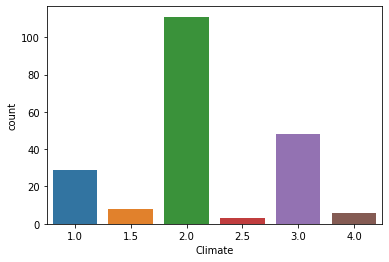

In [86]:
sal=sns.countplot(data['Climate'])
sal

In [87]:
plot=pd.crosstab(index=data['Region'],columns=data['Climate'],margins=True,normalize='index')
plot

Climate                                   1.0       1.5       2.0       2.5  \
Region                                                                        
ASIA (EX. NEAR EAST)                 0.148148  0.037037  0.666667  0.037037   
BALTICS                              0.000000  0.000000  0.000000  0.000000   
C.W. OF IND. STATES                  0.300000  0.000000  0.100000  0.100000   
EASTERN EUROPE                       0.000000  0.000000  0.000000  0.000000   
LATIN AMER. & CARIB                  0.000000  0.066667  0.866667  0.000000   
NEAR EAST                            0.666667  0.000000  0.000000  0.000000   
NORTHERN AFRICA                      0.750000  0.000000  0.000000  0.000000   
NORTHERN AMERICA                     0.333333  0.000000  0.333333  0.000000   
OCEANIA                              0.047619  0.000000  0.904762  0.000000   
SUB-SAHARAN AFRICA                   0.145833  0.083333  0.687500  0.020833   
WESTERN EUROPE                       0.000000  0.000000  0.000000  0.000000   
All                                  0.141463  0.039024  0.541463  0.014634   

Climate                                   3.0       4.0  
Region                                                   
ASIA (EX. NEAR EAST)                 0.111111  0.000000  
BALTICS                              1.000000  0.000000  
C.W. OF IND. STATES                  0.200000  0.300000  
EASTERN EUROPE                       0.888889  0.111111  
LATIN AMER. & CARIB                  0.066667  0.000000  
NEAR EAST                            0.333333  0.000000  
NORTHERN AFRICA                      0.250000  0.000000  
NORTHERN AMERICA                     0.333333  0.000000  
OCEANIA                              0.047619  0.000000  
SUB-SAHARAN AFRICA                   0.062500  0.000000  
WESTERN EUROPE                       0.904762  0.095238  
All                                  0.234146  0.029268

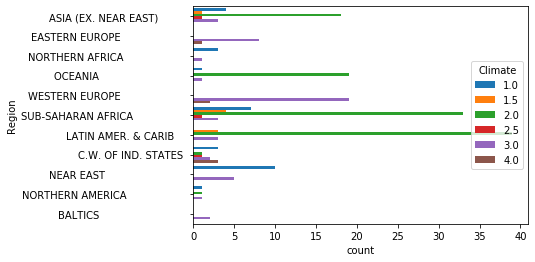

In [88]:
sns.countplot(y='Region',data=data,hue='Climate',saturation=4)

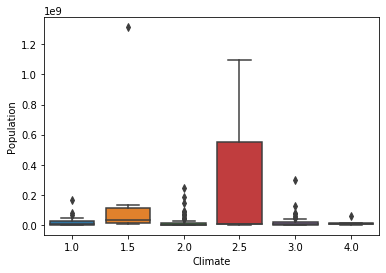

In [89]:
sns.boxplot('Climate','Population',data=data)

In [90]:
#Now lets visulaize the data in bar graph

In [91]:
import matplotlib.pyplot as plt 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 11 Text xticklabel objects>)

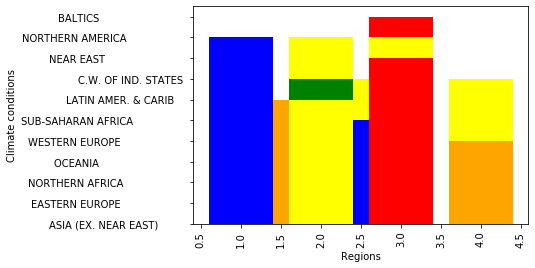

In [92]:
plt.bar(data['Climate'],data['Region'],color=['red','green','blue','brown','yellow','orange'])
plt.ylabel('Climate conditions')
plt.xlabel('Regions')
plt.xticks(rotation=90)

In [93]:
#finding the climate frequency

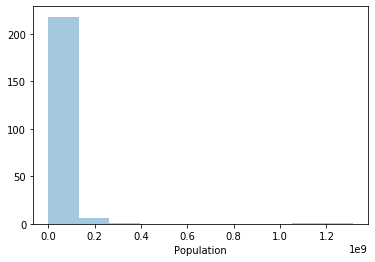

In [94]:
sns.distplot(data['Population'],bins=10,kde=False)

In [97]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]   

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Now look at the Corrleation amoung all the countries
#Correlation "heatmap" show the correlation between all numericall columns(including objects)

In [98]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [99]:
data.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34       0.3800     0.240    0.380  
1      15.11       5.22       0.2320     0.188    0.579  
2      17.14       4.61       0.1010     0.600    0.298  
3      22.46       3.27       0.1505     0.171    0.644  
4       8.71       6.25       0.0220     0.245    0.720

In [100]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [101]:
data.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [103]:
#Now we can see that non of the data is having null values

In [105]:
#The attributes we are condsidering is
#1.--annot for choosing a suitable text color
#2.--cmap this is used to give the shapes depending on the matter present
#3.--fmt till what float point we need to consider

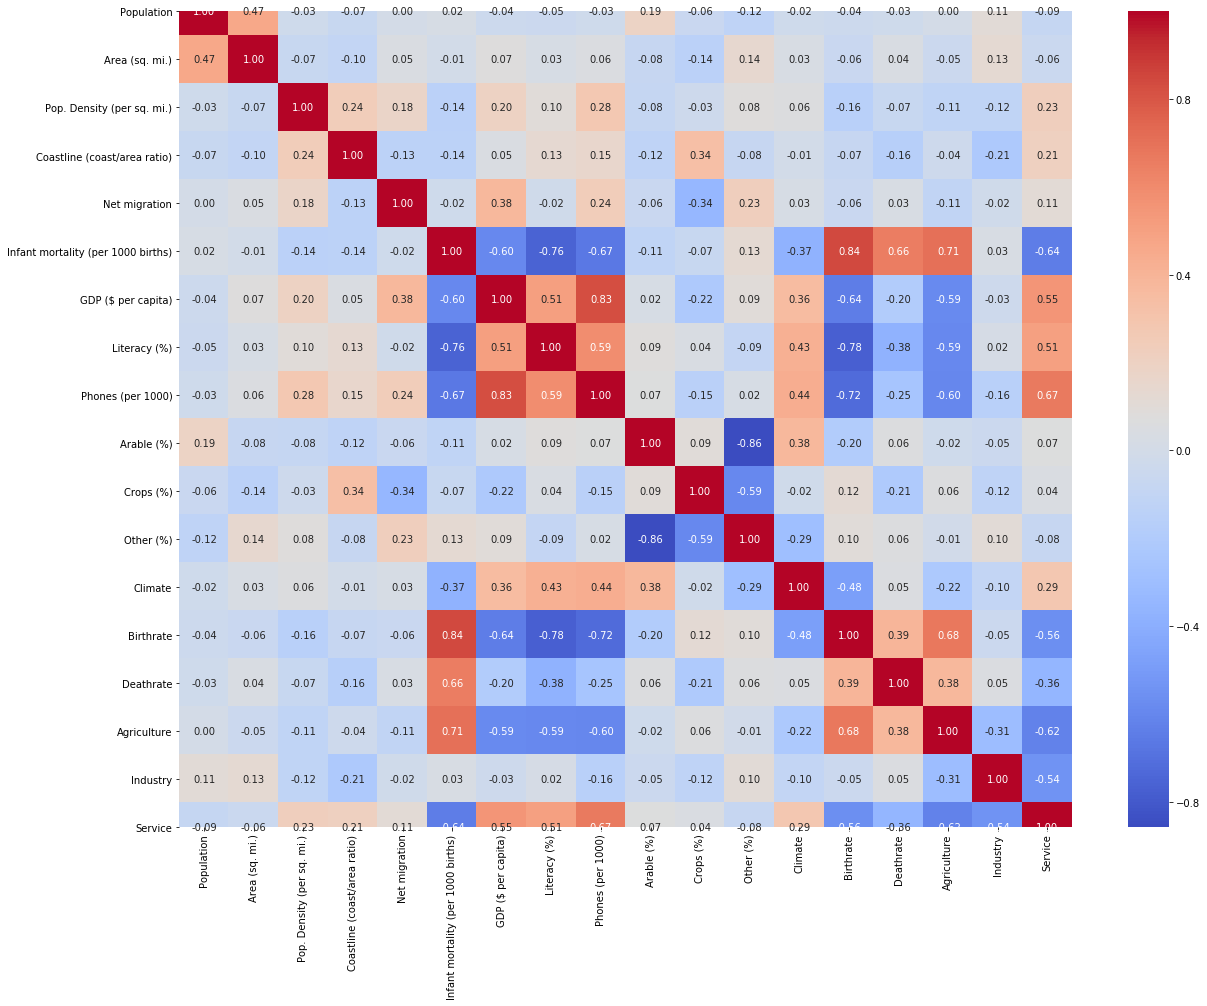

In [109]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [112]:
#Now lets look at the top 20 countries with highest GDP per capita

AttributeError: 'tuple' object has no attribute 'xaxis'

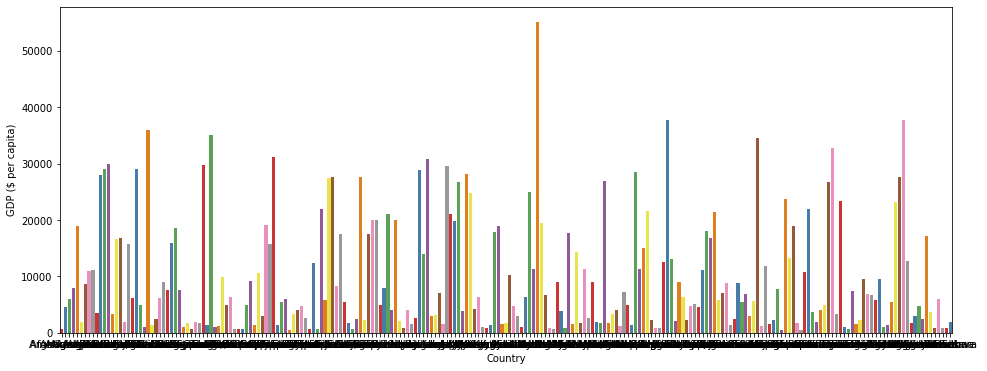

In [116]:
ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=data, palette='Set1')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()